<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/dwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import sys
import h5py #librerua para crear archivos , h5py
import pandas as pd
import math
from scipy.fft import fft, fftfreq

In [2]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import unzipmodule
import graficador

In [4]:

def get_selected_key_and_data(h5py_file_path, index=0):
    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys_1 = list(h5_file.keys())
        selected_key = keys_1[index]
        selected_data = h5_file[selected_key][:]
        print("Selected Key:", selected_key)
    return selected_key, selected_data

In [5]:
def get_lengths_array(coeffs, upper_level):
    sample_counts = [len(arr) for arr in coeffs]
    time_arrays = [np.linspace(0, upper_level, num=samples, endpoint=False) for samples in sample_counts]
    return time_arrays

In [6]:
def plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2):
    num_graphs = len(time_arrays_1)  # Assuming both sets have the same length

    title = [None] * num_graphs
    title[0] = "A" + str(num_graphs - 1)
    title[1] = "D" + str(num_graphs - 1)

    for i in range(2, num_graphs):
        title[i] = "D" + str(num_graphs - i)

    for i in range(num_graphs):
        plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
        # Create titles based on coefficient array lengths
        title_set_1 = title[i]
        title_set_2 = title[i]

        # Check if index is within the range of arrays
        if i < len(time_arrays_1) and i < len(coeffs_1):
            # Plot the first set (time_arrays_1 vs coeffs_1)
            plt.subplot(1, 2, 1)
            plt.plot(time_arrays_1[i], coeffs_1[i], label=title_set_1, color='red')
            plt.xlabel('Time')
            plt.ylabel('Coefficient Value')
            plt.legend()
            plt.title(f'Graph {i} - Set 1: {title_set_1}')

            # Plot the second set (time_arrays_2 vs coeffs_2)
            plt.subplot(1, 2, 2)
            plt.plot(time_arrays_2[i], coeffs_2[i], label=title_set_2, color='blue')
            plt.xlabel('Time')
            plt.ylabel('Coefficient Value')
            plt.legend()
            plt.title(f'Graph {i} - Set 2: {title_set_2}')

            plt.tight_layout()  # Adjust the layout for better visualization
            plt.show()  # Display the current plot window

    return title

In [7]:

def band_maker(coeffs, fs, title):
    p = len(coeffs)- 1
    low_frequencies = [None] * len(coeffs)
    high_frequencies = [None] * len(coeffs)

    # low_frequencies[0] = 0
    # high_frequencies[0] = fs / (2 ** (p) * 2)
    for i in range(0, len(coeffs)):
         high_frequencies[i] = fs / (2 ** (p+-i + 1))
    low_frequencies[0]=0
    low_frequencies[1:len(low_frequencies)]= high_frequencies[:len(low_frequencies) - 1]



    return  high_frequencies,low_frequencies


In [8]:
def frequencies_maker(N,fs,d,D,theta):
  theta=(theta/180)*np.pi
  FTF=(fs/2)*(1-d/D*np.cos(theta))
  BPFI=(N*fs/2)*(1+d/D*np.cos(theta))
  BPFO=(N*fs/2)*(1-d/D*np.cos(theta))
  BSF=(D*fs/d)*(1-(d/D)**2*np.cos(theta))
  return(FTF,BPFI,BPFO,BSF)


In [9]:
#celda para crear la lista con los paths de mi data
paths=[] #creo la lista de pahts
names=[] #creo la lista de nombres
output_file=[]
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3')
names.append('vibration')
names.append('part1')
names.append('part2')
names.append('part3')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1/vibration')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1/part1')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2/part2')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3/part3')


In [10]:
 print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [11]:
print(pywt.wavelist('db'))

['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']


In [12]:
FTF,BPFI,BPFO,BSF=frequencies_maker(9,50.17,7.90,38.5,0)
data = {
    'Name': ['Fundamental train frequency (FTF)', 'Ball pass frequency inner (BPFI)', 'Ball pass frequency outer (BPFO)','Ball spin frequency (BSF)'],
    'Values (HZ)': [FTF, BPFI, BPFO,BSF]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

                                Name  Values (HZ)
0  Fundamental train frequency (FTF)    19.937688
1   Ball pass frequency inner (BPFI)   272.090805
2   Ball pass frequency outer (BPFO)   179.439195
3          Ball spin frequency (BSF)   234.204744


In [13]:
## calculo el nivel del banco de filtro:
fs=math.ceil(FTF) #frecuencia natural , se usa la del train frequencie
fe=25.6e3 # frecuencia de sampleo
n = math.ceil(math.log(fe / fs) / math.log(2)) +2
level = n

Available files:
1. 0Nm_BPFI_03
2. 0Nm_BPFI_10
3. 0Nm_BPFI_30
4. 0Nm_BPFO_03
5. 0Nm_BPFO_10
6. 0Nm_BPFO_30
7. 0Nm_Misalign_01
8. 0Nm_Misalign_03
9. 0Nm_Misalign_05
10. 0Nm_Normal
11. 0Nm_Unbalance_0583mg
12. 0Nm_Unbalance_1169mg
13. 0Nm_Unbalance_1751mg
14. 0Nm_Unbalance_2239mg
15. 0Nm_Unbalance_3318mg
16. 2Nm_BPFI_03
17. 2Nm_BPFI_10
18. 2Nm_BPFI_30
19. 2Nm_BPFO_03
20. 2Nm_BPFO_10
21. 2Nm_BPFO_30
22. 2Nm_Misalign_01
23. 2Nm_Misalign_03
24. 2Nm_Misalign_05
25. 2Nm_Normal
26. 2Nm_Unbalalnce_0583mg
27. 2Nm_Unbalalnce_1169mg
28. 2Nm_Unbalalnce_1751mg
29. 2Nm_Unbalalnce_2239mg
30. 2Nm_Unbalalnce_3318mg
31. 4Nm_BPFI_03
32. 4Nm_BPFI_10
33. 4Nm_BPFI_30
34. 4Nm_BPFO_03
35. 4Nm_BPFO_10
36. 4Nm_BPFO_30
37. 4Nm_Misalign_01
38. 4Nm_Misalign_03
39. 4Nm_Misalign_05
40. 4Nm_Normal
41. 4Nm_Unbalance_0583mg
42. 4Nm_Unbalance_1169mg
43. 4Nm_Unbalance_1751mg
44. 4Nm_Unbalance_2239mg
45. 4Nm_Unbalance_3318mg
Enter the index of the file you want to plot: 2
Do you want an interactive graph? (yes/no): no


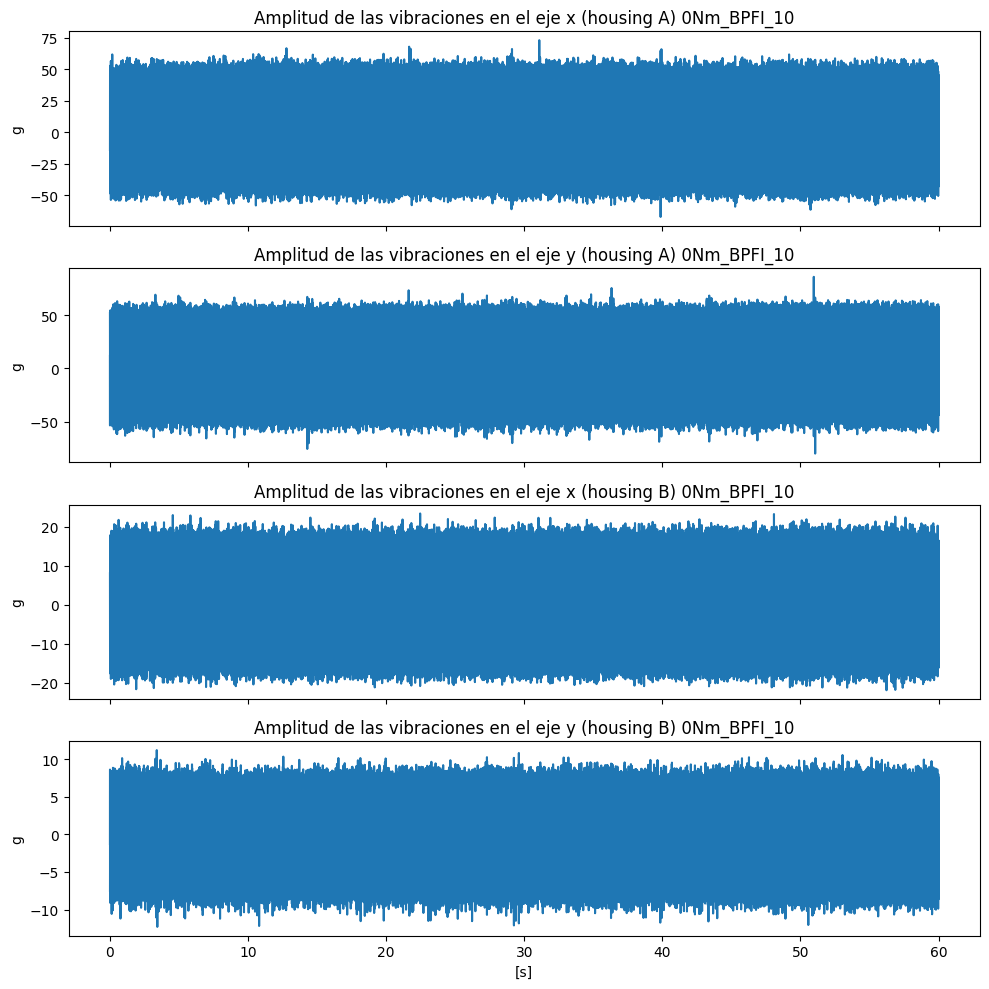

In [ ]:
time_array=graficador.plot_data_from_h5py(output_file[0])

In [111]:
h5py_file_path=output_file[0]
selected_key_fault,selected_data_fault=get_selected_key_and_data(h5py_file_path, index=4)

Selected Key: 0Nm_BPFO_10


In [119]:

w = pywt.Wavelet('db38')
signal_faulty= selected_data_fault[:,2] ##rodamiento b bajo falla (eje x)
# # Perform DWT
coeffs_2 = pywt.wavedec(signal_faulty, w, level=level)
time_arrays_2=get_lengths_array(coeffs_2,300)

Available files:
1. 0Nm_BPFI_03
2. 0Nm_BPFI_10
3. 0Nm_BPFI_30
4. 0Nm_BPFO_03
5. 0Nm_BPFO_10
6. 0Nm_BPFO_30
7. 0Nm_Misalign_01
8. 0Nm_Misalign_03
9. 0Nm_Misalign_05
10. 0Nm_Normal
11. 0Nm_Unbalance_0583mg
12. 0Nm_Unbalance_1169mg
13. 0Nm_Unbalance_1751mg
14. 0Nm_Unbalance_2239mg
15. 0Nm_Unbalance_3318mg
16. 2Nm_BPFI_03
17. 2Nm_BPFI_10
18. 2Nm_BPFI_30
19. 2Nm_BPFO_03
20. 2Nm_BPFO_10
21. 2Nm_BPFO_30
22. 2Nm_Misalign_01
23. 2Nm_Misalign_03
24. 2Nm_Misalign_05
25. 2Nm_Normal
26. 2Nm_Unbalalnce_0583mg
27. 2Nm_Unbalalnce_1169mg
28. 2Nm_Unbalalnce_1751mg
29. 2Nm_Unbalalnce_2239mg
30. 2Nm_Unbalalnce_3318mg
31. 4Nm_BPFI_03
32. 4Nm_BPFI_10
33. 4Nm_BPFI_30
34. 4Nm_BPFO_03
35. 4Nm_BPFO_10
36. 4Nm_BPFO_30
37. 4Nm_Misalign_01
38. 4Nm_Misalign_03
39. 4Nm_Misalign_05
40. 4Nm_Normal
41. 4Nm_Unbalance_0583mg
42. 4Nm_Unbalance_1169mg
43. 4Nm_Unbalance_1751mg
44. 4Nm_Unbalance_2239mg
45. 4Nm_Unbalance_3318mg
Enter the index of the file you want to plot: 10
Do you want an interactive graph? (yes/no): no


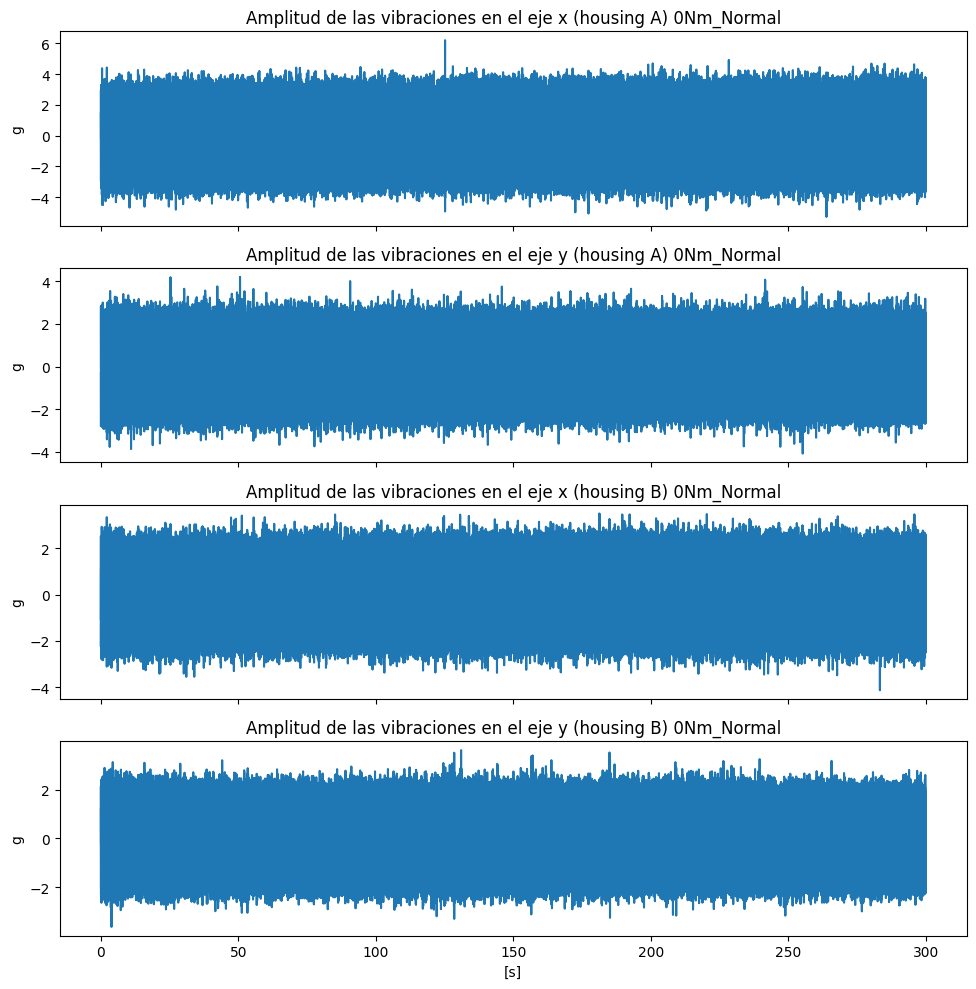

In [ ]:
time_array=graficador.plot_data_from_h5py(output_file[0])

In [16]:
h5py_file_path=output_file[0]
selected_key_healty,selected_data_healty=get_selected_key_and_data(h5py_file_path, index=9)

Selected Key: 0Nm_Normal


In [74]:
##3calculo    B en el eje x  sano
w = pywt.Wavelet('db38')
signal_healty= selected_data_healty [:,2]
# # Perform DWT
coeffs_1 = pywt.wavedec(signal_healty, w, level=level)
time_arrays_1=get_lengths_array(coeffs_1,300)

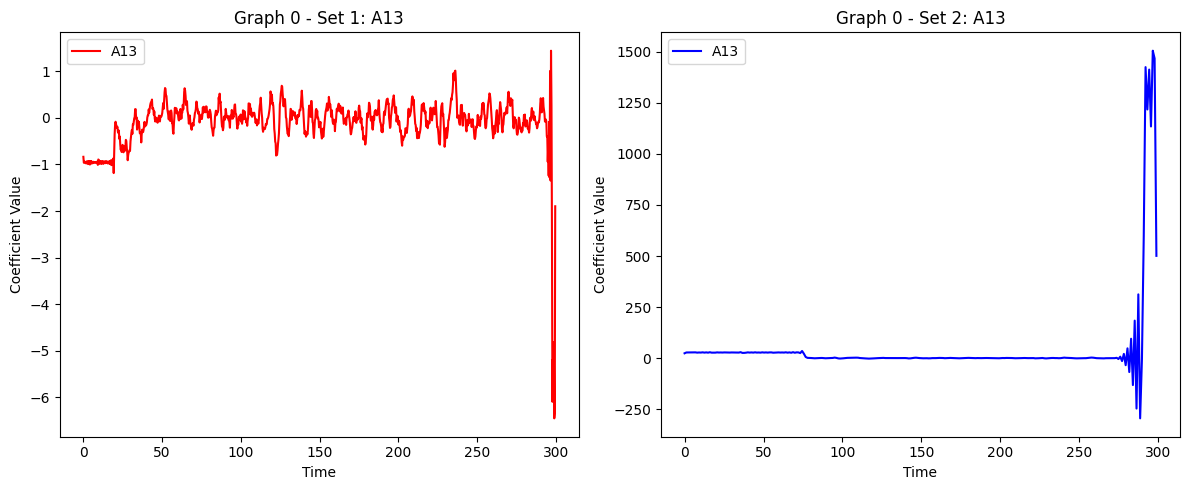

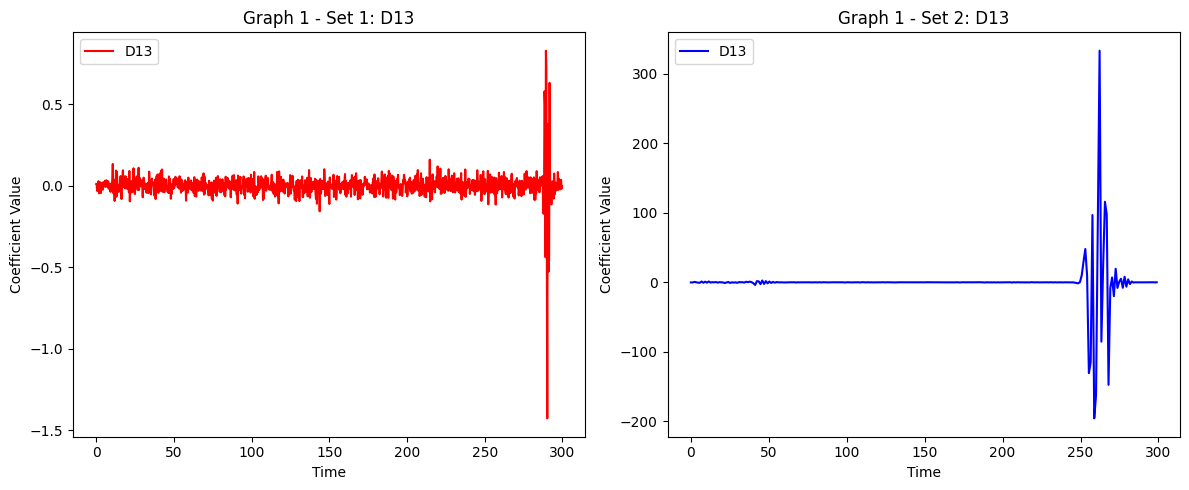

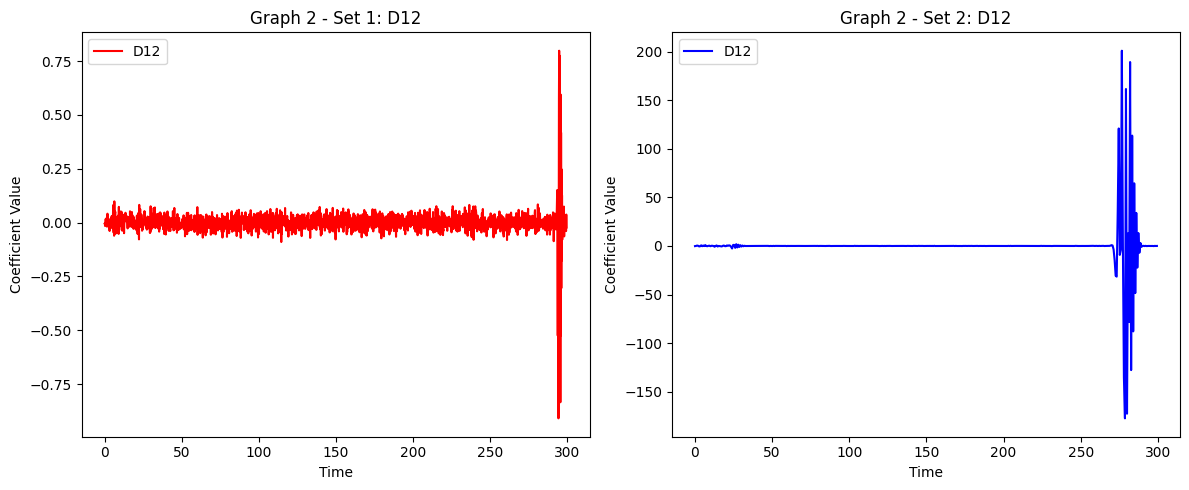

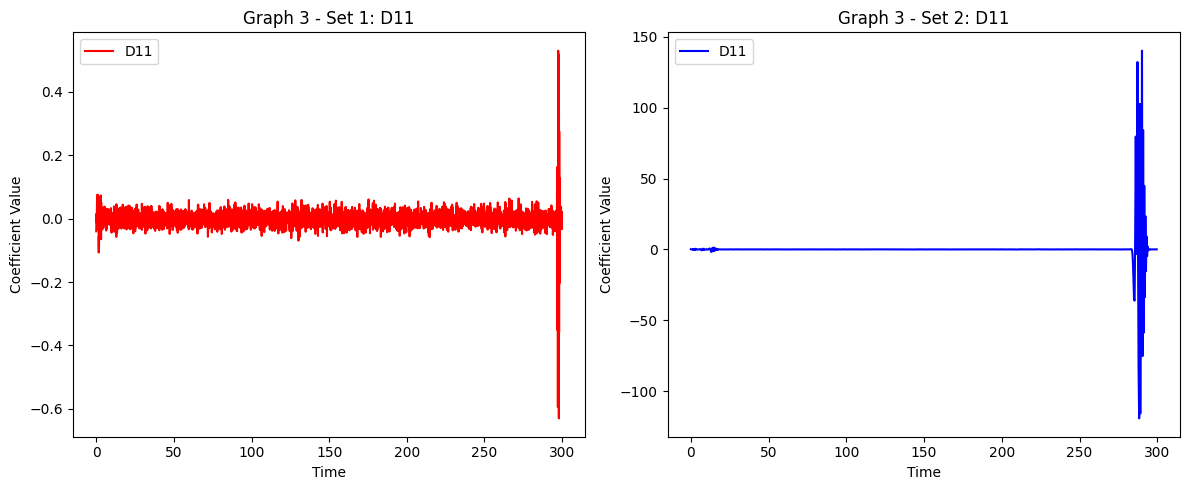

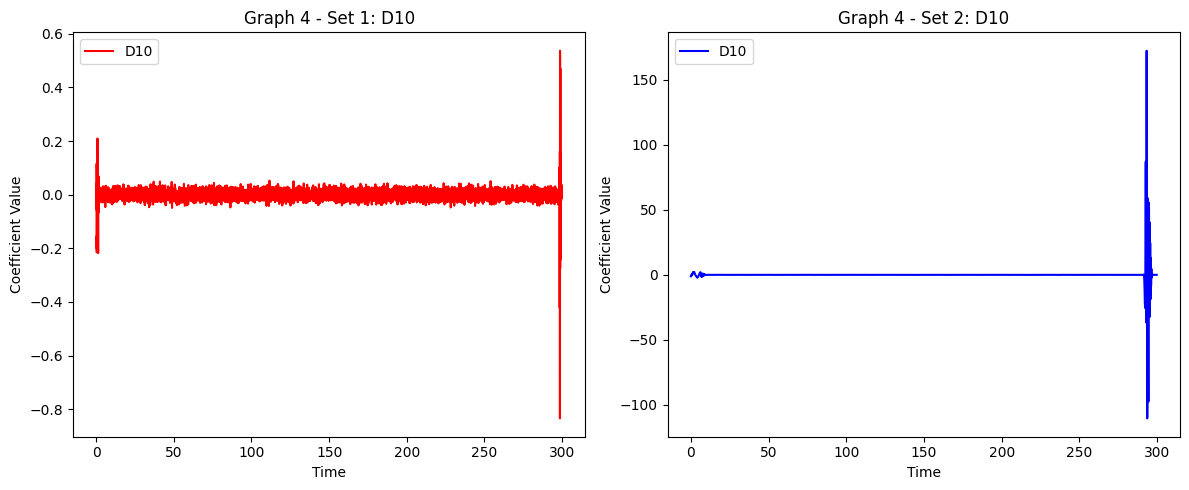

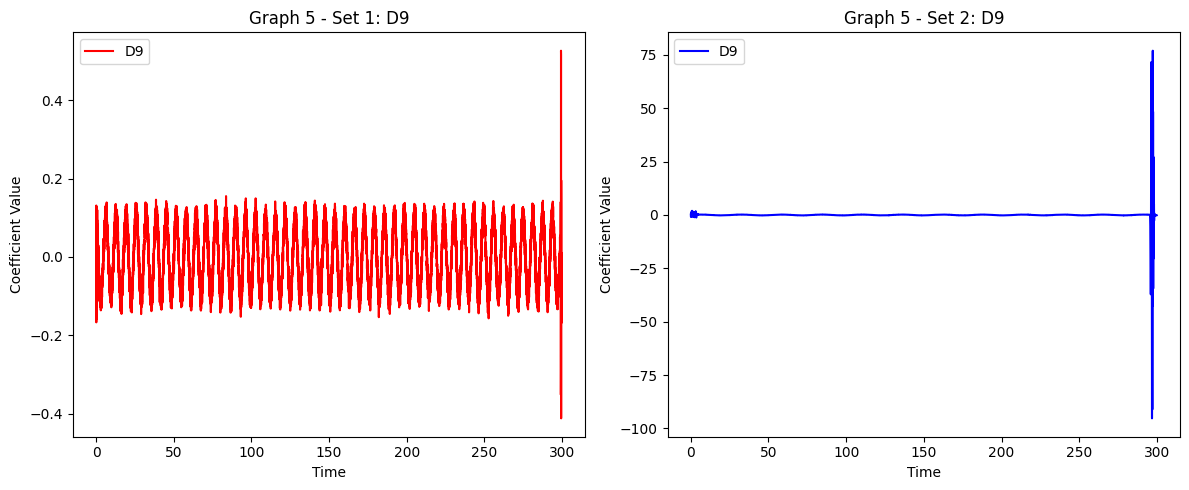

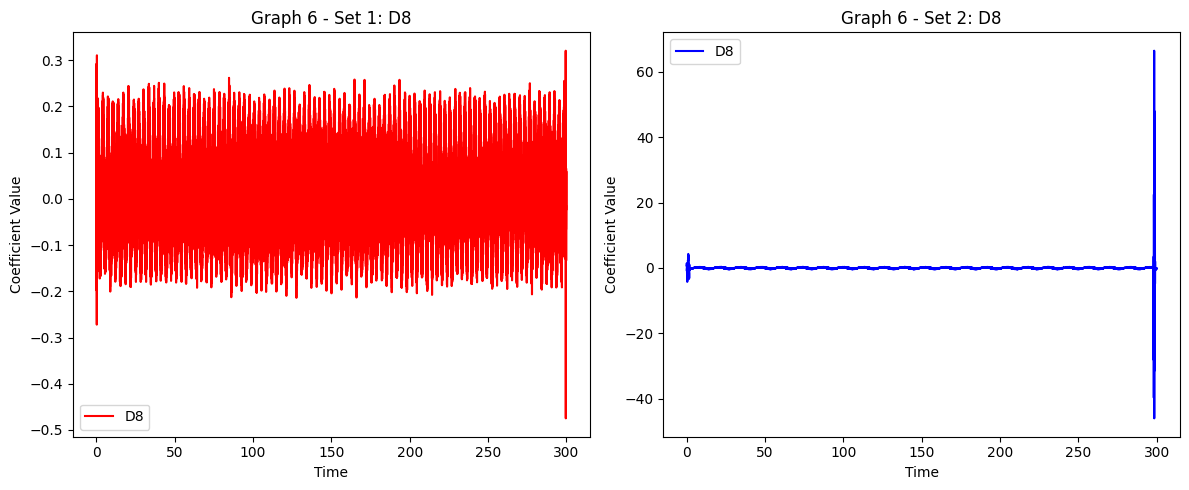

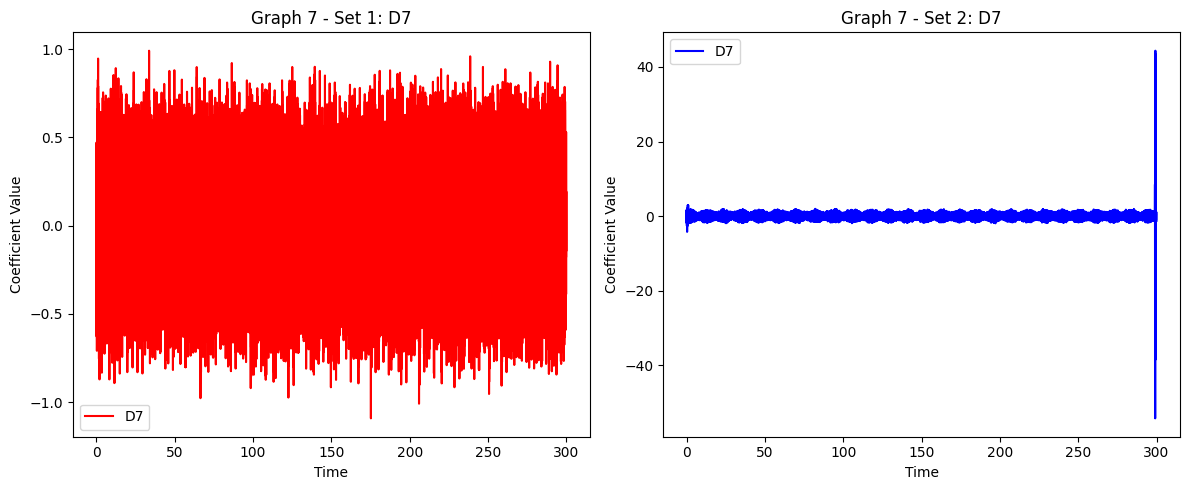

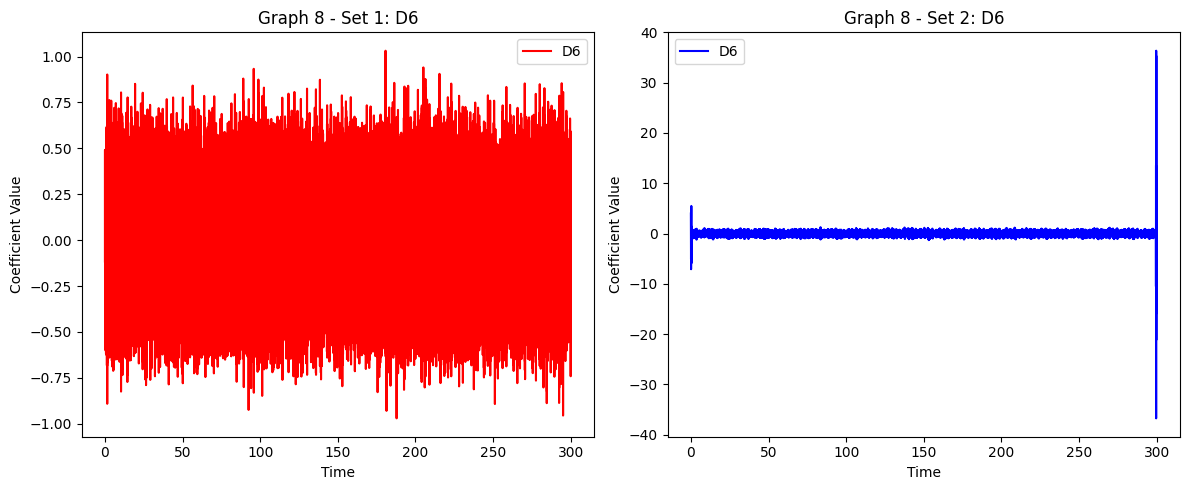

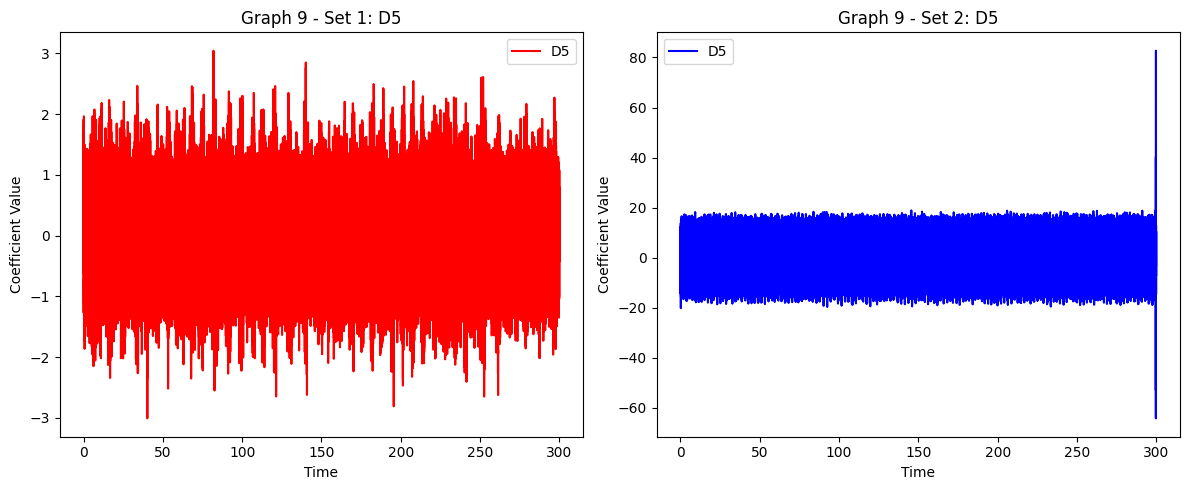

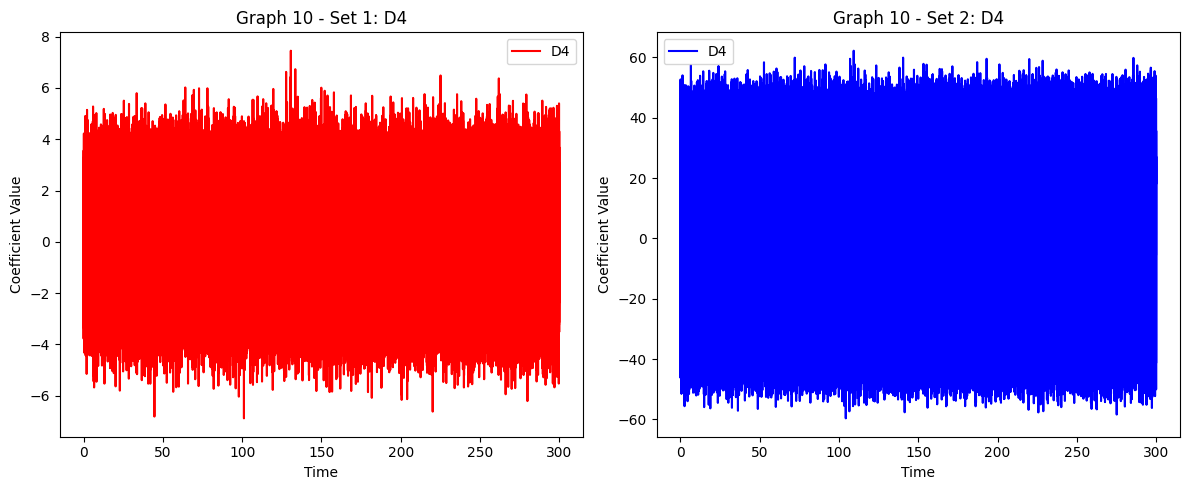

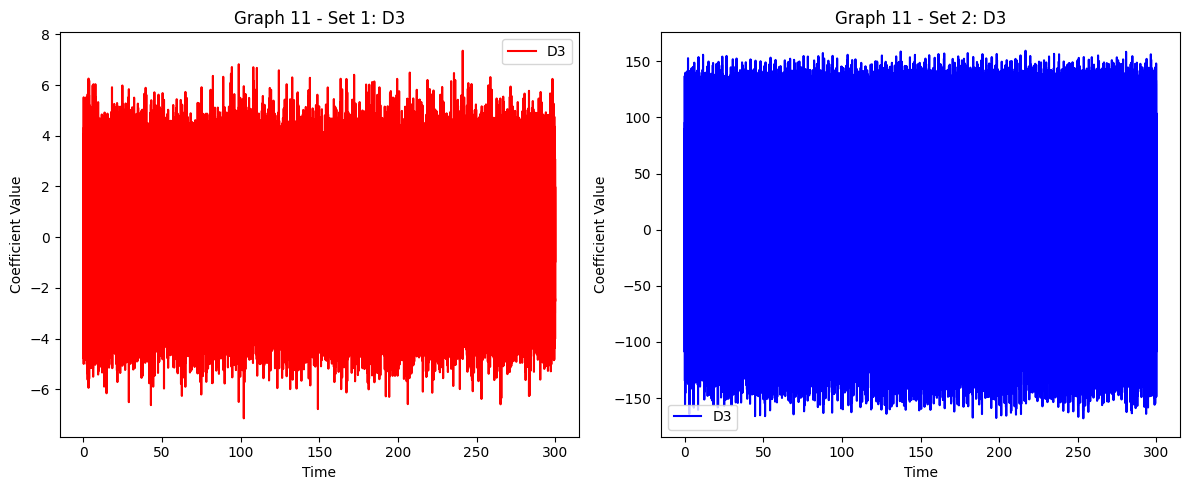

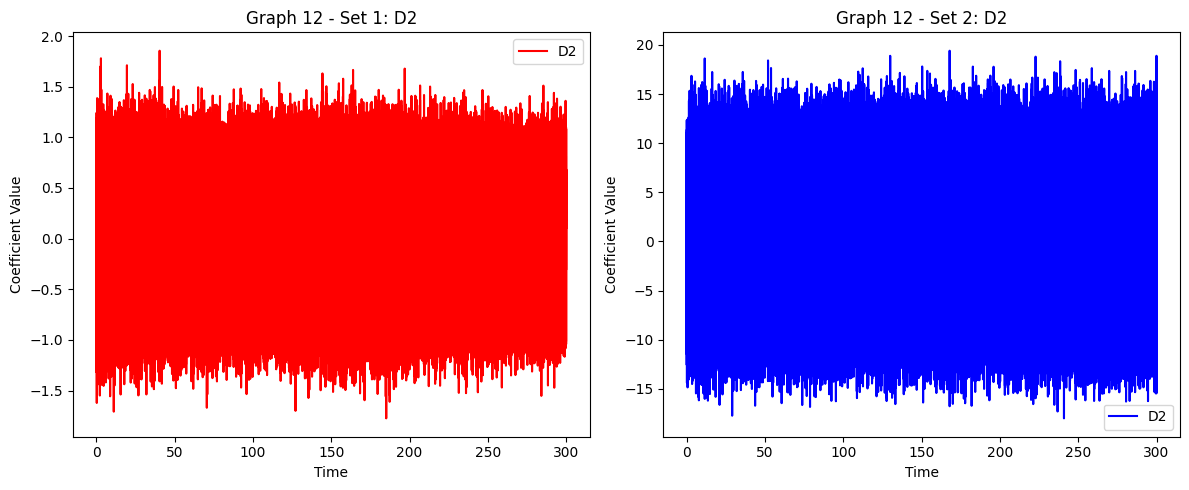

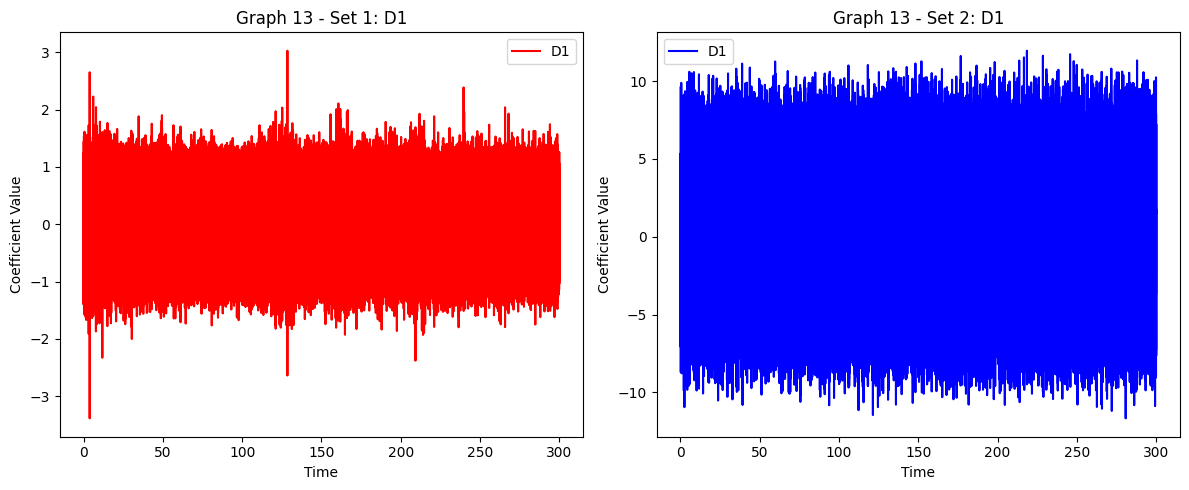

In [18]:
title=plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2)

In [ ]:

fs = 25.6e3
high_frequencies,  low_frequencies = band_maker(coeffs_2, fs, title)
df = pd.DataFrame({'Coefficient': title, 'Low Frequency': low_frequencies, 'High Frequency': high_frequencies})
df


,Coefficient,Low Frequency,High Frequency
0,A13,0.0000,1.5625
1,D13,1.5625,3.1250
2,D12,3.1250,6.2500
3,D11,6.2500,12.5000
4,D10,12.5000,25.0000
5,D9,25.0000,50.0000
6,D8,50.0000,100.0000
7,D7,100.0000,200.0000
8,D6,200.0000,400.0000
9,D5,400.0000,800.0000


In [75]:
energies_healty = []
x=coeffs_1
for sub_array in x:
    energy = np.sum(np.abs(sub_array)**2)
    energies_healty.append(energy)
max_energy = max(energies_healty)
normalized_energies_healty = [energy / max_energy for energy in energies_healty]

In [120]:
energies_faulty = []
x_1=coeffs_2
for sub_array in x_1:
    energy = np.sum(np.abs(sub_array)**2)
    energies_faulty .append(energy)
max_energy = max(energies_faulty)
normalized_energies_faulty = [energy / max_energy for energy in energies_faulty]

In [121]:
df = pd.DataFrame({'Coefficient': title, 'Nivel de energia rodamiento sano ':  energies_healty, 'Nivel de energia rodamiento bajo falla ': energies_faulty})
df

,Coefficient,Nivel de energia rodamiento sano,Nivel de energia rodamiento bajo falla
0,A13,3.530751e+02,4.398660e+05
1,D13,6.971298e+00,8.003556e+03
2,D12,6.587700e+00,7.207044e+03
3,D11,3.749971e+00,3.265054e+03
4,D10,4.132019e+00,2.449673e+03
5,D9,8.819267e+01,1.518959e+03
6,D8,2.758217e+02,7.771666e+02
7,D7,5.176935e+03,1.057656e+04
8,D6,6.461301e+03,8.826769e+03
9,D5,7.198866e+04,1.091201e+06


In [122]:
df1 = pd.DataFrame({'Coefficient': title, 'Nivel de energia rodamiento sano normalizado':  normalized_energies_healty, 'Nivel de energia rodamiento bajo falla normalizado ': normalized_energies_faulty})
df1

,Coefficient,Nivel de energia rodamiento sano normalizado,Nivel de energia rodamiento bajo falla normalizado
0,A13,0.000182,0.007008
1,D13,0.000004,0.000128
2,D12,0.000003,0.000115
3,D11,0.000002,0.000052
4,D10,0.000002,0.000039
5,D9,0.000045,0.000024
6,D8,0.000142,0.000012
7,D7,0.002670,0.000169
8,D6,0.003333,0.000141
9,D5,0.037134,0.017385


In [23]:
def find_indices_with_name(h5py_file_path, target_name): # #esta funcion me permite buscar los indices asociados a a mi palabra target
    indices = []

    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for index, key in enumerate(keys):
            if target_name in key:
                indices.append(index)

    return indices

In [24]:
def get_selected_keys_and_data(h5py_file_path, target_name, index): #funcion que en base a los indices me devuelve las keys
    selected_keys = []

    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for key in keys:
            if target_name in key:
                selected_keys.append(key)


    return selected_keys

In [25]:
def return_data(output_file, target_name):
  all_selected_keys_1 = []

  for file_path in output_file:
      indices = find_indices_with_name(file_path, target_name)
      selected_keys = get_selected_keys_and_data(file_path,target_name, indices)

      for key in (selected_keys):
          all_selected_keys_1.append([key])
  all_keys= [None] * len(all_selected_keys_1)
  ##########################################
  for i in range(0,len(all_selected_keys_1)): # aqui creo la lista para guardar los string de las key
      all_keys[i]=all_selected_keys_1[i][0]
      #######################################
  selected_data = []
  #########################################
  for selected_key in all_keys: # algoritmo para obtener la data en el orden de las keys
    for file_path in output_file:
      with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        if selected_key in keys:
          #print("esta en el archivo")
          selected_data.append( h5_file[selected_key][:])

        else:
          #print('no esta ')
          continue

  return (all_keys,selected_data)


In [26]:
def calculate_energy_levels(selected_data, wavelet='db38', level=5): #funcion para calcular los niveles energeticos de los data set
    w = pywt.Wavelet(wavelet)
    array_dwt = np.empty((len(selected_data), selected_data[0].shape[1]), dtype=list)

    for j in range(len(selected_data)):
        for i in range(selected_data[j].shape[1]):
            coeffs = pywt.wavedec(selected_data[j][:, i], w, level=level)
            energies_levels = [np.sum(np.abs(coeffs)**2) for coeffs in coeffs]
            array_dwt[j, i] = energies_levels

    return array_dwt

In [27]:
def normalize_energies(energies_level): #funcio para calcular los niveles energeticos normalizados
    normalized_energies = []
    max_energy = max(energies_level)
    normalized_energies=([energy / max_energy for energy in energies_level])

    return normalized_energies

In [28]:
def data_set_two(coeff, all_keys_n_w_constant, all_keys_f_w_constant, energy_level_n_w_constant, energy_level_f_w_constant):  #funcion para determinar el nivel energetico para los rodamientos A y B bajo falla en el segundo data set
    energies_level_f_B = []
    energies_level_f_name_B = []
    energies_level_f_A = []
    energies_level_f_name_A = []

    for i, name_normal in enumerate(all_keys_n_w_constant):
        for j, name_faulty in enumerate(all_keys_f_w_constant):
            if name_normal[0:3] == name_faulty[0:3]:
                if energy_level_n_w_constant[i][0][coeff] < energy_level_f_w_constant[j][0][coeff]:  # eje x de la casa de rodamientos A
                    energies_level_f_A.append(energy_level_f_w_constant[j][0])
                    energies_level_f_name_A.append(name_faulty)
                if energy_level_n_w_constant[i][2][coeff] < energy_level_f_w_constant[j][2][coeff]:  # eje x de la casa de rodamientos B
                    energies_level_f_B.append(energy_level_f_w_constant[j][2])
                    energies_level_f_name_B.append(name_faulty)

    return energies_level_f_A, energies_level_f_B, energies_level_f_name_A, energies_level_f_name_B

In [179]:
def concatenation(energies):### funcion para convertir los void array in normal array to train the network
    converted_arrays = [np.array(element[0]) for element in energies]
    resulting_array = np.vstack(converted_arrays)

    return resulting_array

### Parte  segundo data set

Calculo de los coeficientes energeticos para el caso vibration_normal (velocidad variable)


In [29]:
all_keys_normal,selected_data_normal=return_data(output_file, "normal")

In [30]:
energies_level_normal=calculate_energy_levels(selected_data_normal, wavelet='db38', level=level)

Calculo de los coeficientes energeticos para el caso vibration_ball (velocidad variable)


In [32]:
all_keys_ball,selected_data_ball=return_data(output_file, "ball")

In [33]:
energies_level_ball=calculate_energy_levels(selected_data_ball, wavelet='db38', level=level)

Calculo de los coeficientes energeticos para el caso vibration_inner  (velocidad variable)



In [34]:
all_keys_inner,selected_data_inner=return_data(output_file, "inner")

In [35]:
energies_level_inner=calculate_energy_levels(selected_data_inner, wavelet='db38', level=level)

Calculo de los coeficientes energeticos para el caso vibration_outer (velocidad variable)

In [36]:
all_keys_outer,selected_data_outer=return_data(output_file, "outer")

In [37]:
energies_level_outer=calculate_energy_levels(selected_data_outer, wavelet='db38', level=level)

Selecciono el eje x para cada falla en base a una comparacio (veo la maxima energia del coeficiente 7 para fallas outer y la maxima energia en el coeficiente 6 para fallas inner y ball)

In [126]:
# trabajo solo con el eje x
# Create structured arrays with specific data types and length
energies_level_outer_B =[]
energies_level_outer_name =[]
energies_level_inner_B =[]
energies_level_inner_name =[]
energies_level_ball_B =[]
energies_level_ball_name =[]

for i in range(0, energies_level_normal.shape[0]):
    if energies_level_normal[i][2][7] <= energies_level_outer[i][2][7]:# coefficnete 7
        energies_level_outer_B.append(energies_level_outer[i][2]) # el dos indica que solo estoy trabajando con el eje x del rodamiento B
        energies_level_outer_name.append(all_keys_outer[i])
    if energies_level_normal[i][2][8] <= energies_level_inner[i][2][8]: # coeficiente 6
        energies_level_inner_B.append(energies_level_inner[i][2])
        energies_level_inner_name.append(all_keys_inner[i])
    if energies_level_normal[i][2][8] <= energies_level_ball[i][2][8]: # coeficiente 6
        energies_level_ball_B.append( energies_level_ball[i][2])
        energies_level_ball_name.append(all_keys_ball[i])


Calculo los niveles energeticos normalizados para el caso de rodamiento sano

In [39]:
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
    ('field1', object),  # You can change 'field1' to a more meaningful name
    ('field2', object),  # You can change 'field2' to a more meaningful name
    ('field3', object)   # You can change 'field3' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_normal_normalized = np.empty(len(energies_level_normal), dtype=dtype)
for i, x in enumerate(all_keys_normal):
  energies_level_normal_normalized['field0'][i] = normalize_energies(energies_level_normal[i][0])
  energies_level_normal_normalized['field1'][i] = normalize_energies(energies_level_normal[i][1])
  energies_level_normal_normalized['field2'][i] = normalize_energies(energies_level_normal[i][2])
  energies_level_normal_normalized['field3'][i] = normalize_energies(energies_level_normal[i][3])



Calculo los niveles energeticos normalizados para el caso de falla en el elemento rodante

In [40]:

# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_ball_normalized = np.empty(len(energies_level_ball_B), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_ball_name):
    energies_level_ball_normalized['field0'][i] = normalize_energies(energies_level_ball_B[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres




Calculo los niveles energeticos normalizados para el caso de falla en el anillo interno

In [41]:

# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_inner_normalized = np.empty(len(energies_level_inner_B), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_inner_name):
    energies_level_inner_normalized['field0'][i] = normalize_energies(energies_level_inner_B[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

Calculo los niveles energeticos normalizados para el caso de falla en el anillo externo

In [124]:

# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_outer_normalized = np.empty(len(energies_level_outer_B), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_outer_name):
    energies_level_outer_normalized['field0'][i] = normalize_energies(energies_level_outer_B[i])  ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

## Parte 2 primer data set (velocidad constante , carga variable)

In [43]:
all_keys_normal_w_constant,selected_data_normal_w_constant=return_data(output_file, "Normal")
energies_level_normal_w_constant=calculate_energy_levels(selected_data_normal_w_constant, wavelet='db38', level=level)

In [44]:
all_keys_inner_w_constant,selected_data_inner_w_constant=return_data(output_file, "BPFI")
energies_level_inner_w_constant=calculate_energy_levels(selected_data_inner_w_constant, wavelet='db38', level=level)

In [45]:
all_keys_outter_w_constant,selected_data_outter_w_constant=return_data(output_file, "BPFO")
energies_level_outter_w_constant=calculate_energy_levels(selected_data_outter_w_constant, wavelet='db38', level=level)

### Calculo de los niveles energeticos por rodamiento (A y B)

In [53]:
energies_level_inner_A_constant, energies_level_inner_B_constant, energies_level_inner_name_A_constant, energies_level_inner_name_B_constant= data_set_two(8, all_keys_normal_w_constant, all_keys_inner_w_constant, energies_level_normal_w_constant, energies_level_inner_w_constant)

In [54]:
energies_level_outter_A_constant, energies_level_outter_B_constant, energies_level_outter_name_A_constant, energies_level_outter_name_B_constant= data_set_two(7, all_keys_normal_w_constant, all_keys_outter_w_constant, energies_level_normal_w_constant, energies_level_outter_w_constant)

### calculo de los niveles normalizados para el caso de rodamiento sano

In [48]:
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
    ('field1', object),  # You can change 'field1' to a more meaningful name
    ('field2', object),  # You can change 'field2' to a more meaningful name
    ('field3', object)   # You can change 'field3' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_normal_w_constant_normalized = np.empty(len(energies_level_normal_w_constant), dtype=dtype)
for i, x in enumerate(all_keys_normal_w_constant):
  energies_level_normal_w_constant_normalized['field0'][i] = normalize_energies(energies_level_normal_w_constant[i][0])
  energies_level_normal_w_constant_normalized['field1'][i] = normalize_energies(energies_level_normal_w_constant[i][1])
  energies_level_normal_w_constant_normalized['field2'][i] = normalize_energies(energies_level_normal_w_constant[i][2])
  energies_level_normal_w_constant_normalized['field3'][i] = normalize_energies(energies_level_normal_w_constant[i][3])

###Calculo de los niveles normalizados para el caso en el anillo interno  por rodamiento (A y B)

Niveles normalizados anillo interno

In [58]:
# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_inner_normalized_A_w_constant= np.empty(len(energies_level_inner_A_constant), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_inner_name_A_constant):
    energies_level_inner_normalized_A_w_constant['field0'][i] = normalize_energies(energies_level_inner_A_constant[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

In [59]:
# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_inner_normalized_B_w_constant= np.empty(len(energies_level_inner_B_constant), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_inner_name_B_constant):
    energies_level_inner_normalized_B_w_constant['field0'][i] = normalize_energies(energies_level_inner_B_constant[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

Niveles normalizados anillo externo

In [105]:
# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_outter_normalized_A_w_constant= np.empty(len(energies_level_outter_A_constant), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_inner_name_A_constant):
    energies_level_outter_normalized_A_w_constant['field0'][i] = normalize_energies(energies_level_outter_A_constant[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

In [106]:
# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_outter_normalized_B_w_constant= np.empty(len(energies_level_outter_B_constant), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_inner_name_B_constant):
    energies_level_outter_normalized_B_w_constant['field0'][i] = normalize_energies(energies_level_outter_B_constant[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

### PARTE 3 CONCATENACION DE DATOS Y CREACION DE LAYERS

In [245]:
energies_level_normal_normalized ## variable que contiene ambos rodamientos (sanos) segundo data set
print(all_keys_normal)
converted_arrays = [np.array(element[0]) for element in energies_level_normal_normalized] #eje x del rodamiento A
converted_arrays_1 = [np.array(element[2]) for element in energies_level_normal_normalized] # eje x del rodamiento B
# Convert the list of arrays into a NumPy array
energies_level_normal_normalized_A = np.array(converted_arrays)
energies_level_normal_normalized_B= np.array(converted_arrays_1)

['vibration_normal_0', 'vibration_normal_1', 'vibration_normal_2', 'vibration_normal_constant', 'vibration_normal_3', 'vibration_normal_4', 'vibration_normal_5', 'vibration_normal_6']


In [214]:
energies_level_ball_normalized ## variable que contiene solo rodamiento B  segundo data set
print(energies_level_ball_name)
energies_level_ball_normalized_array=concatenation(energies_level_ball_normalized) #solo tengo el eje x del rodamiento B

['vibration_ball_0', 'vibration_ball_1', 'vibration_ball_2', 'vibration_ball_3', 'vibration_ball_4', 'vibration_ball_5', 'vibration_ball_6']


In [183]:
energies_level_inner_normalized ## variable que contiene solo rodamiento B  segundo data set
print(energies_level_inner_name)
energies_level_inner_normalized_array=concatenation(energies_level_ball_normalized)

['vibration_inner_0', 'vibration_inner_1', 'vibration_inner_2', 'vibration_inner_3', 'vibration_inner_4', 'vibration_inner_5', 'vibration_inner_6']


In [184]:
energies_level_outer_normalized ## variable que contiene solo rodamiento B  segundo data set
print(energies_level_outer_name)
energies_level_outter_normalized_array=concatenation(energies_level_ball_normalized)

['vibration_outer_0', 'vibration_outer_2', 'vibration_outer_3', 'vibration_outer_4', 'vibration_outer_5', 'vibration_outer_6']


In [ ]:
layers=np.hstack((np.array(all_keys_normal),np.array(all_keys_normal),np.array(energies_level_ball_name),np.array(energies_level_inner_name),np.array(energies_level_outer_name)))
layers

In [ ]:
# x=np.vstack((energies_level_normal_normalized_A, energies_level_normal_normalized_B, energies_level_ball_normalized_array,energies_level_inner_normalized_array,energies_level_outter_normalized_array))

In [280]:
def create_mask_array(layers):
    # Initialize an empty mask array
    mask_array = np.zeros(len(layers), dtype=int)

    # Check each element of the 'layers' array
    for i, layer in enumerate(layers):
        # Check if the word "normal" or "Normal" is not in the layer name
        if "normal" not in layer.lower():
            mask_array[i] = 1  # Set the corresponding element to 1

    return mask_array

In [281]:
y_hat=create_mask_array(layers)